In [2]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
#Load data for train and test
path = r"C:\Users\piyu\Downloads\Documents - Don't Delete\Kaggle datasets\housing_price\train.csv"
train = pd.read_csv(path)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of the training data
train.shape

(1460, 81)

In [6]:
# info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Analysis of target feature

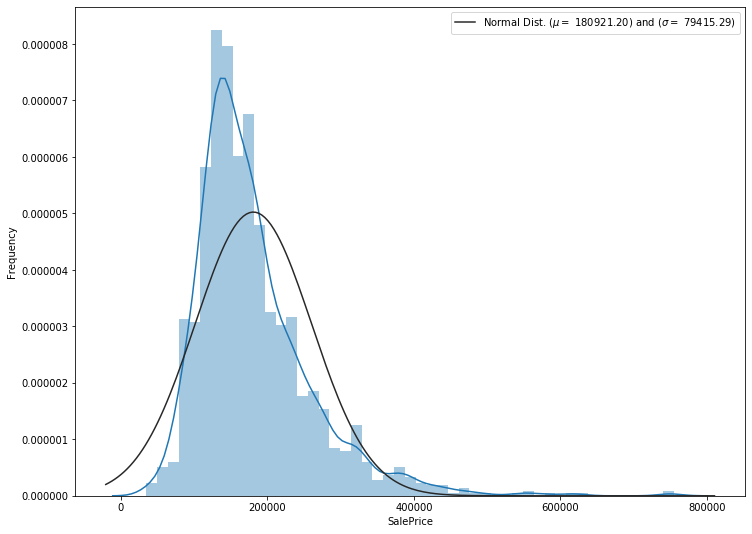

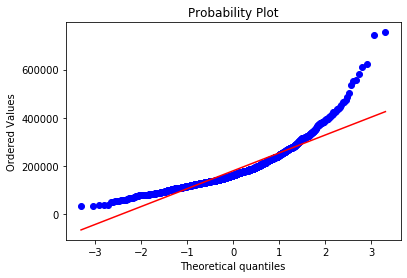

In [7]:
# defining parameters for plotting 
plt.subplots(figsize= (12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get fitted parameters used by function

(mu, sigma) = stats.norm.fit(train['SalePrice'])
mu
sigma

# plot with the distribution
plt.legend(['Normal Dist. ($\mu=$ {:.2f}) and ($\sigma= $ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

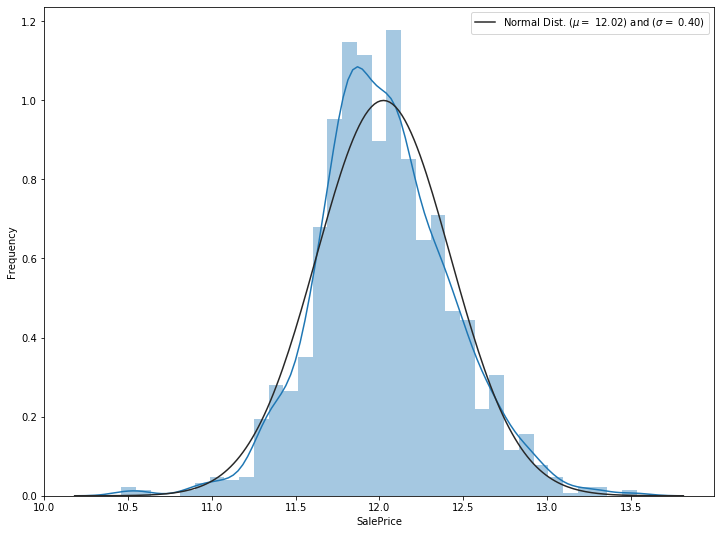

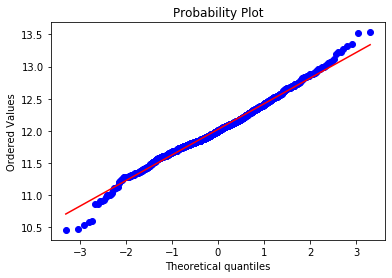

In [8]:
# Using log funciton to remove skewness 

train['SalePrice'] = np.log1p(train['SalePrice'])

# check again for normal distribution
plt.subplots(figsize= (12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get fitted parameters used by function

(mu, sigma) = stats.norm.fit(train['SalePrice'])
mu
sigma

# plot with the distribution
plt.legend(['Normal Dist. ($\mu=$ {:.2f}) and ($\sigma= $ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)

plt.show()


Now it appears good and plot is very much close to normal distribution.
Now, lets check for any missing values in table columns.


In [9]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

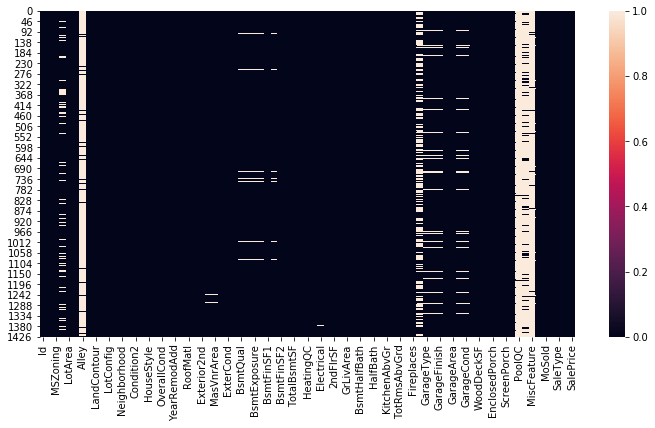

In [10]:
# Plot of missing value attributes
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [11]:
# missing value counts in each of these column names
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
# converting to dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['Count']
Isnull.index.names = ['Names']

In [13]:
Isnull['Names'] = Isnull.index

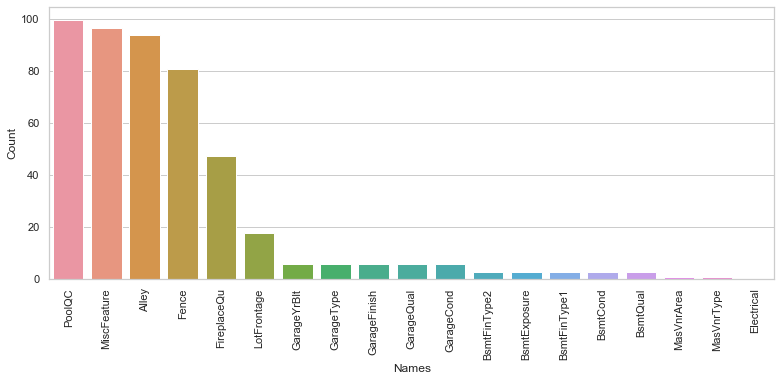

In [14]:
# Plot missing values
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Names', y='Count', data=Isnull)
plt.xticks(rotation=90)
plt.show()

Corralation between train attributes

In [15]:
# Separate variable into new dataframe from original dataframe which has only numerical values
# there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=np.number)
train_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [16]:
train_corr.shape


(1460, 38)

In [17]:
# Delete Id column as it is not required for correlation plot
del train_corr['Id']

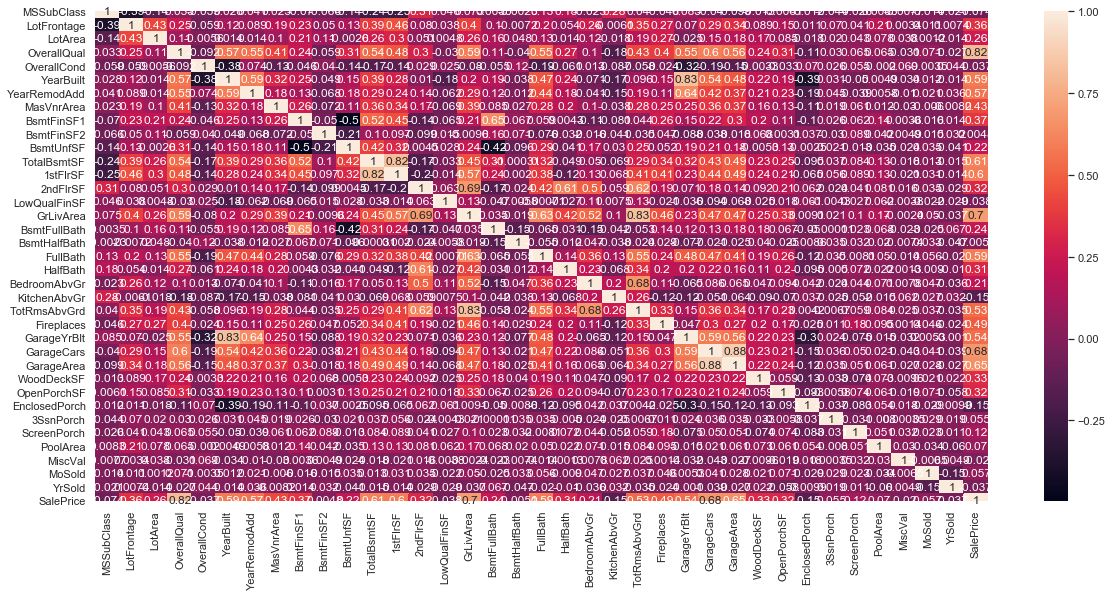

In [18]:
# correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Picking up index where correlation of 'SalePrice' is greater that 0.5; i.e. Top 50% Corralation train attributes with sale-price.

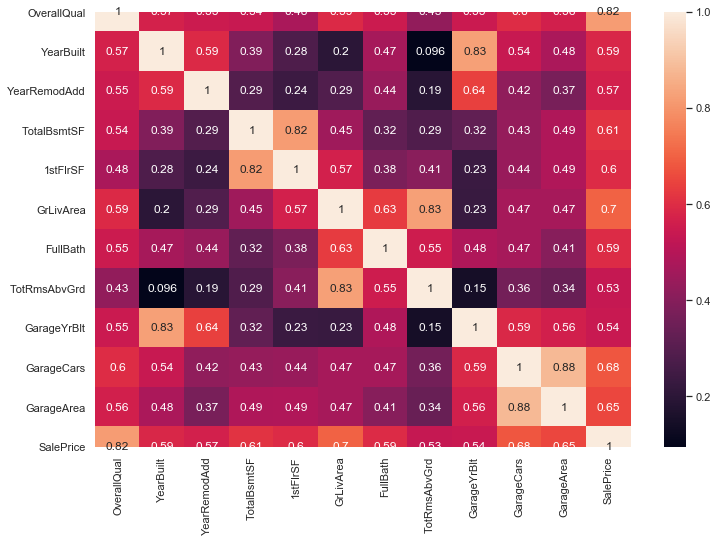

In [19]:
top_feature = corr.index[abs(corr['SalePrice']>.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here OverallQual is highly correlated with target feature of saleprice by 82%



In [20]:
# Unique value of OverallQual 
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

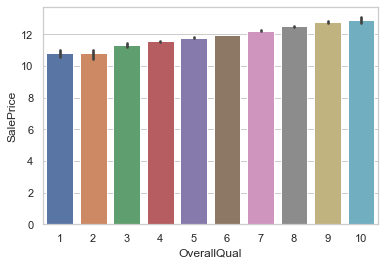

In [21]:
# Bar plot for the visualization
sns.barplot(train.OverallQual, train.SalePrice)

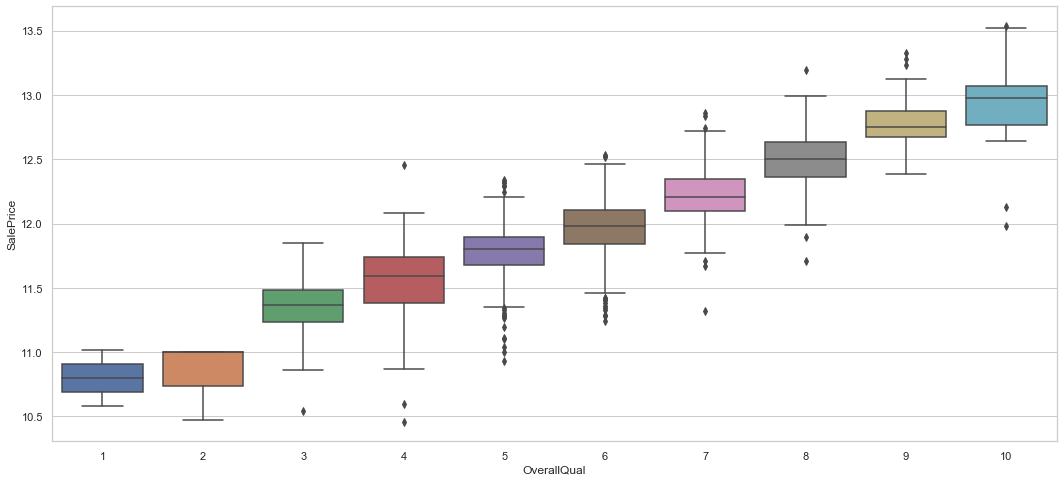

In [22]:
# box plot for the visualization
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


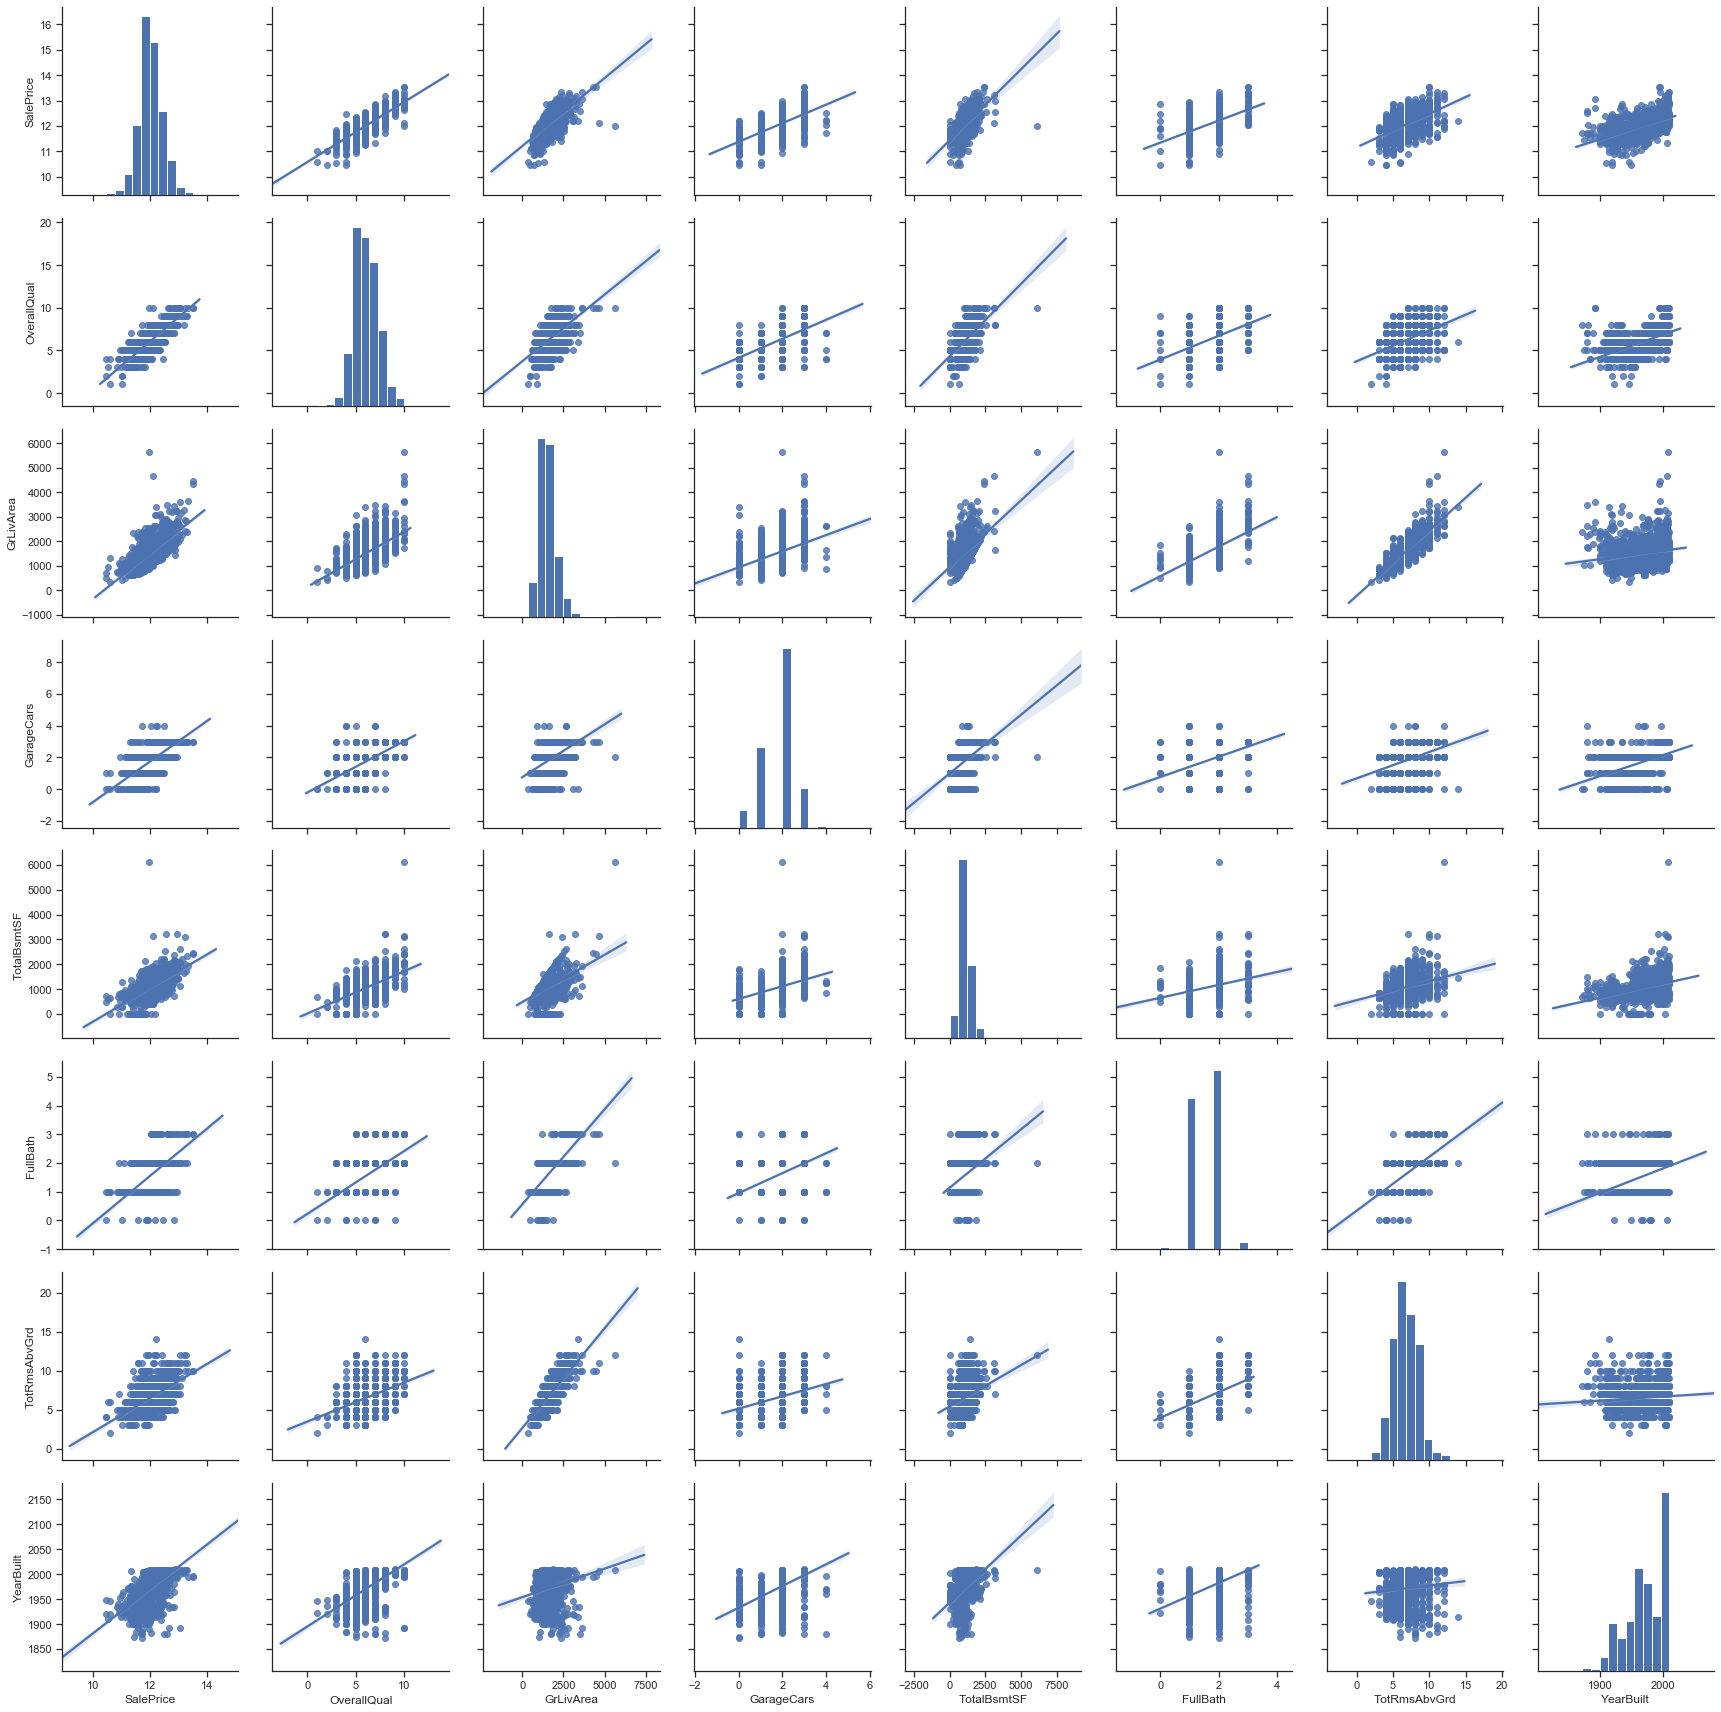

In [23]:
# Let's plot a pairplot to get understanding and better visualization

col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [24]:
print("Find most correlated values to the saleprice, so that we use it for further analysis. These highly correlated values have maximum effect on the output")
corr=train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most correlated values to the saleprice, so that we use it for further analysis. These highly correlated values have maximum effect on the output


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

# Imputting missing values

In [25]:
# PoolQC has maximum missing values and therefore fill by none
train['PoolQC'] = train['PoolQC'].fillna('None')

In [26]:
# for attributes with 50% null values will be filled by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [27]:
# for LotFrontage, groupby neighborhood and fillna by median value
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [28]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [29]:
# GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [30]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [39]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [44]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [45]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [46]:
#There is no need of Utilities
# train = train.drop(['Utilities'], axis=1)

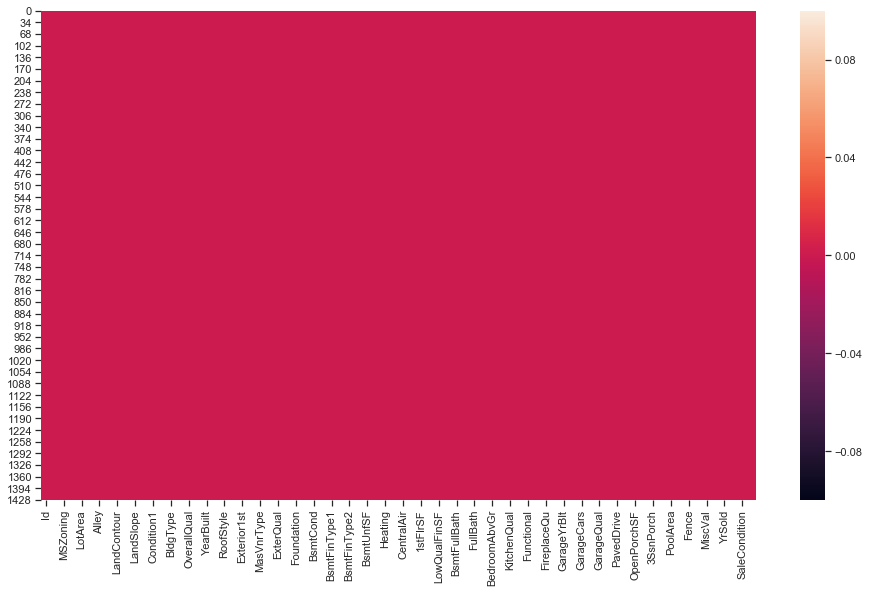

In [47]:
# Checking there is any null value or not
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

Now, there is no any missing values¶


Encoding str to int


In [48]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [49]:
from sklearn.preprocessing import LabelEncoder

In [51]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))
    train[c]

# Prepraring data for prediction


In [53]:
# Taking target variable into y
y = train['SalePrice']

In [54]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [55]:
# delete saleprice column from data now
del train['SalePrice']

In [62]:
# Take all of values in X and y
X = train.values
y = y.values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [63]:
y.shape

(1460,)

In [64]:
X.shape

(1460, 79)

In [65]:
# Coverting into above results into Numpy array which we can feed to model for processing


In [66]:
# split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [68]:
X_train.shape

(1168, 79)

# Linear Regression¶


In [69]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [70]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# Predicting the values now
print("Predict value - "+ str(model.predict([X_test[100]])))
print("Real value - "+ str(y_test[100]))

Predict value - [11.83233429]
Real value - 11.87688084212164


In [73]:
# calculating accuracy
print("Model accuracy - ", model.score(X_test, y_test)*100)

Model accuracy -  89.26708677161473


# RandomForestRegression¶


In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000)

In [76]:
# Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
# Predicting the values now
print("Predict value - "+ str(model.predict([X_test[100]])))
print("Real value - "+ str(y_test[100]))

Predict value - [11.92729536]
Real value - 11.87688084212164


In [78]:
# calculating accuracy of RandomForestRegressor
print("Model accuracy - ", model.score(X_test, y_test)*100)

Model accuracy -  89.48278081791231


# GradientBoostingRegressor

In [79]:
# fit the model again
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth=4)

In [80]:
# Fit the model
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
# Predicting the values now
print("Predict value - "+ str(model.predict([X_test[100]])))
print("Real value - "+ str(y_test[100]))

Predict value - [11.81947659]
Real value - 11.87688084212164


In [82]:
# calculating accuracy of RandomForestRegressor
print("Model accuracy - ", model.score(X_test, y_test)*100)

Model accuracy -  91.74831714778058


In [83]:
# As we see RandomForest Gives maximum accuracy